In [ ]:
note_seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [ ]:
note_seq[0:4], note_seq[1:5], note_seq[2:6]

(['g8', 'e8', 'e4', 'f8'], ['e8', 'e4', 'f8', 'd8'], ['e4', 'f8', 'd8', 'd4'])

In [ ]:
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

In [ ]:
len(note_seq), range(len(note_seq)-4)   # [4, 8, 12, ...]

(54, range(0, 50))

In [ ]:
code2idx['g8']

11

In [ ]:
dataset = list()
for i in range(len(note_seq)-4):
  subset = note_seq[i:i+4]
  items = list()
  # print(subset)
  for item in subset:
    # print(code2idx[item])
    items.append(code2idx[item])
  # print(items)
  dataset.append(items)

print(dataset)

[[11, 9, 2, 10], [9, 2, 10, 8], [2, 10, 8, 1], [10, 8, 1, 7], [8, 1, 7, 8], [1, 7, 8, 9], [7, 8, 9, 10], [8, 9, 10, 11], [9, 10, 11, 11], [10, 11, 11, 4], [11, 11, 4, 11], [11, 4, 11, 9], [4, 11, 9, 9], [11, 9, 9, 9], [9, 9, 9, 10], [9, 9, 10, 8], [9, 10, 8, 1], [10, 8, 1, 7], [8, 1, 7, 9], [1, 7, 9, 11], [7, 9, 11, 11], [9, 11, 11, 9], [11, 11, 9, 9], [11, 9, 9, 2], [9, 9, 2, 8], [9, 2, 8, 8], [2, 8, 8, 8], [8, 8, 8, 8], [8, 8, 8, 8], [8, 8, 8, 9], [8, 8, 9, 3], [8, 9, 3, 9], [9, 3, 9, 9], [3, 9, 9, 9], [9, 9, 9, 9], [9, 9, 9, 9], [9, 9, 9, 10], [9, 9, 10, 4], [9, 10, 4, 11], [10, 4, 11, 9], [4, 11, 9, 2], [11, 9, 2, 10], [9, 2, 10, 8], [2, 10, 8, 1], [10, 8, 1, 7], [8, 1, 7, 9], [1, 7, 9, 11], [7, 9, 11, 11], [9, 11, 11, 9], [11, 11, 9, 9]]


In [ ]:
import numpy as np
datasets = np.array(dataset)

In [ ]:
x_train = datasets[:,0:3]
x_train.shape, #x_train

((50, 3),)

In [ ]:
y_train = datasets[:,3]
y_train.shape, #y_train

((50,),)

In [ ]:
len(code2idx)

14

In [ ]:
x_train = x_train / 13 # len(code2idx)
x_train[3]

array([0.76923077, 0.61538462, 0.07692308])

# make model

In [ ]:
import tensorflow as tf

In [ ]:
x_train.shape, x_train[2]     # --> scale

((50, 3), array([0.15384615, 0.76923077, 0.61538462]))

In [ ]:
X_train = np.reshape(x_train, (50, 3, 1))     # tensor
X_train.shape, X_train[2]

((50, 3, 1), array([[0.15384615],
        [0.76923077],
        [0.61538462]]))

In [ ]:
np.unique(y_train)

array([ 1,  2,  3,  4,  7,  8,  9, 10, 11])

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(3,1))) # input layer
model.add(tf.keras.layers.LSTM(128)) # hidden layer
model.add(tf.keras.layers.Dense(13, activation='softmax')) # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # gadget

In [ ]:
hist = model.fit(X_train, y_train, epochs=1500, batch_size=10) # 50 / 5 = 10

# Evaluate

In [ ]:
model.evaluate(X_train, y_train)

2/2 [==============================] - 0s 7ms/step - loss: 2.4870 - accuracy: 0.3400


[2.4869561195373535, 0.3400000035762787]

In [ ]:
X_train[4:5]

array([[[0.61538462],
        [0.07692308],
        [0.53846154]]])

In [ ]:
model.predict(X_train[4:5])

array([[0.07106394, 0.07412417, 0.07354543, 0.07495426, 0.07514702,
        0.07543624, 0.07398973, 0.07796606, 0.08171809, 0.08657895,
        0.07724   , 0.08448614, 0.07374995]], dtype=float32)

In [ ]:
first = 0.61538462
second = 0.07692308
third = 0.53846154

In [ ]:
# [[[0.61538462], [0.07692308], [0.53846154]]]
# pred = model.predict([[[first], [second], [third]]])
pred = model.predict(X_train[0:1])

In [ ]:
np.argmax(pred)

10

In [ ]:
# note_seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
#        'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
#        'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
#        'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [ ]:
# code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
#             'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

In [34]:
import matplotlib.pyplot as plt

In [35]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

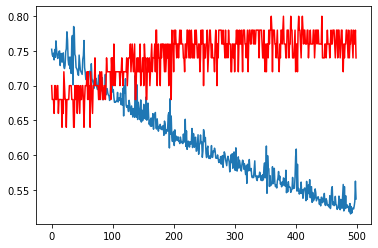

In [36]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'], 'r-')
plt.show()